Парная линейная регрессия

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv('x.csv')
y = pd.read_csv('y.csv')

In [3]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [4]:
x = pd.read_csv('x.csv', index_col=0)['0']
y = pd.read_csv('y.csv', index_col=0)['0']

In [5]:
x.head()

,0
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214


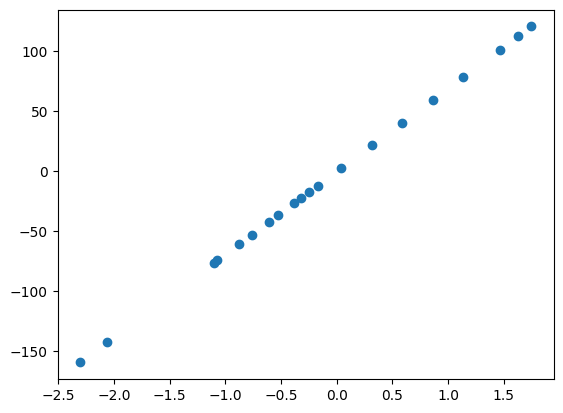

In [6]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [14]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def fit(self, X, Y):
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)


0
0
initial error: 2937.6446095153406


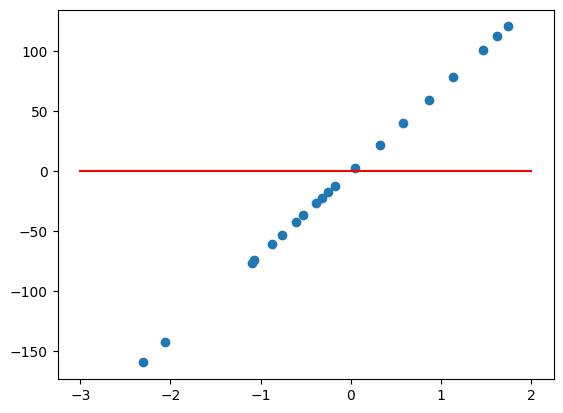

In [15]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [16]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2253.7456808918546


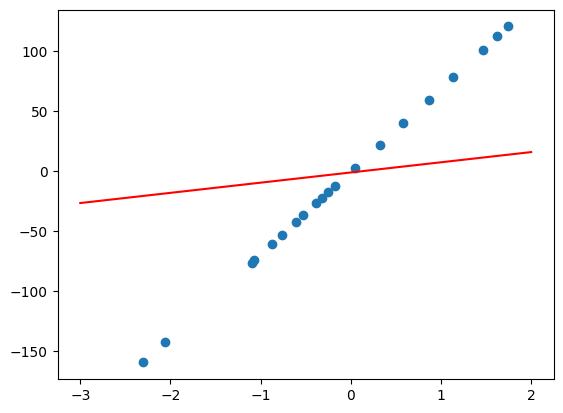

In [17]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [20]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


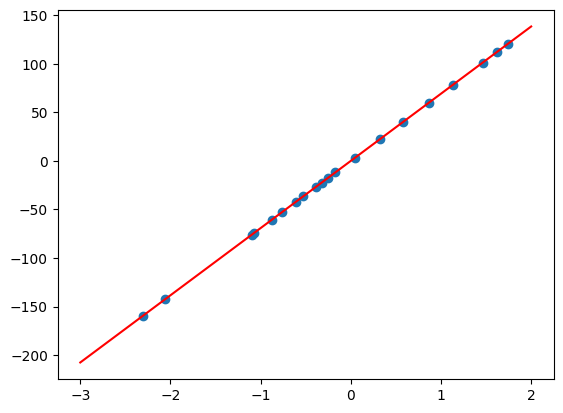

In [21]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

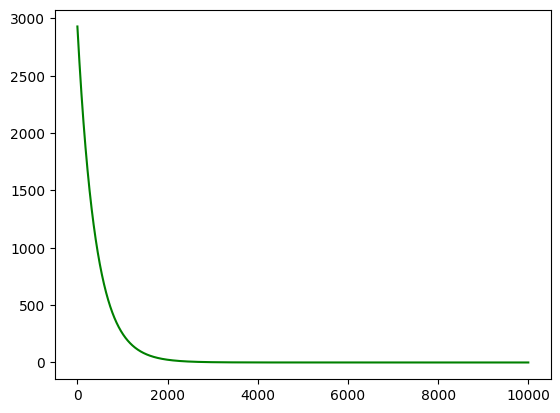

In [22]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

**Задание 1.** Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

Начальные b0=0, b1=0 → Финальные b0=-0.1991, b1=68.9863
Начальные b0=10, b1=-10 → Финальные b0=-0.1497, b1=68.9860
Начальные b0=-5, b1=5 → Финальные b0=-0.2238, b1=68.9865
Начальные b0=20, b1=20 → Финальные b0=0.0148, b1=69.1021


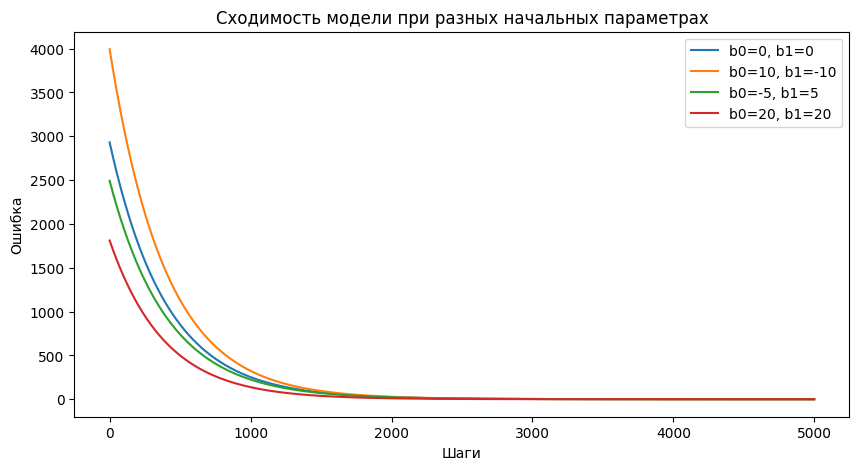

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = pd.read_csv('x.csv', index_col=0)['0']
y = pd.read_csv('y.csv', index_col=0)['0']

class Model:
    """Модель парной линейной регрессии с возможностью задавать начальные параметры"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def fit(self, X, Y, alpha=0.001, max_steps=5000):
        steps, errors = [], []
        for step in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)

            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_err = self.error(X, Y)
            steps.append(step)
            errors.append(new_err)

            # Если ошибка стабилизировалась, прерываем обучение
            if step > 1 and abs(errors[-1] - errors[-2]) < 1e-6:
                break

        return steps, errors

# Разные начальные значения параметров
initial_values = [(0, 0), (10, -10), (-5, 5), (20, 20)]

plt.figure(figsize=(10, 5))

for b0, b1 in initial_values:
    model = Model(b0, b1)
    steps, errors = model.fit(x, y)

    print(f"Начальные b0={b0}, b1={b1} → Финальные b0={model.b0:.4f}, b1={model.b1:.4f}")
    plt.plot(steps, errors, label=f'b0={b0}, b1={b1}')

plt.xlabel("Шаги")
plt.ylabel("Ошибка")
plt.legend()
plt.title("Сходимость модели при разных начальных параметрах")
plt.show()


**Задание 2.** Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

При alpha=0.0001 ошибка стабилизировалась на 855.0919
При alpha=0.001 ошибка стабилизировалась на 0.0394
При alpha=0.01 ошибка стабилизировалась на 0.0001
При alpha=0.1 ошибка стабилизировалась на 0.0000
При alpha=1 ошибка стабилизировалась на 0.0000
При alpha=10 градиентный спуск разошелся!
При alpha=10 ошибка стабилизировалась на 387211.4709


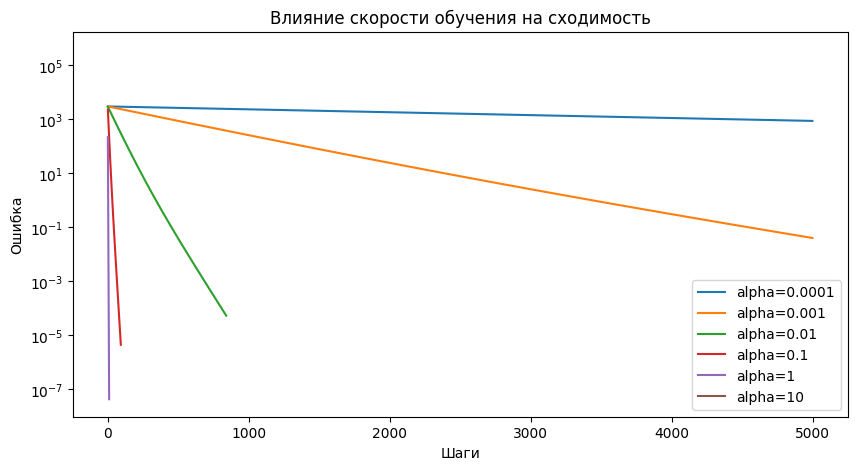

In [25]:
class Model:
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def fit(self, X, Y, alpha=0.001, max_steps=5000):
        steps, errors = [], []
        for step in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)

            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_err = self.error(X, Y)

            # Проверка на расходимость
            if np.isnan(new_err) or new_err > 1e6:
                print(f"При alpha={alpha} градиентный спуск разошелся!")
                return steps, errors  # Прерываем обучение

            steps.append(step)
            errors.append(new_err)

            # Если ошибка стабилизировалась, прерываем обучение
            if step > 1 and abs(errors[-1] - errors[-2]) < 1e-6:
                break

        return steps, errors

# Разные значения скорости обучения
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]

plt.figure(figsize=(10, 5))

for alpha in alphas:
    model = Model()
    steps, errors = model.fit(x, y, alpha=alpha)

    if errors:  # Добавляем на график только корректные значения
        print(f"При alpha={alpha} ошибка стабилизировалась на {errors[-1]:.4f}")
        plt.plot(steps, errors, label=f'alpha={alpha}')

plt.xlabel("Шаги")
plt.ylabel("Ошибка")
plt.yscale("log")  # Логарифмический масштаб
plt.legend()
plt.title("Влияние скорости обучения на сходимость")
plt.show()


**Задание 3.** Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

Проверка работы с DataFrame и Series
Градиентный спуск завершен за 5000 шагов, финальная ошибка: 0.039373


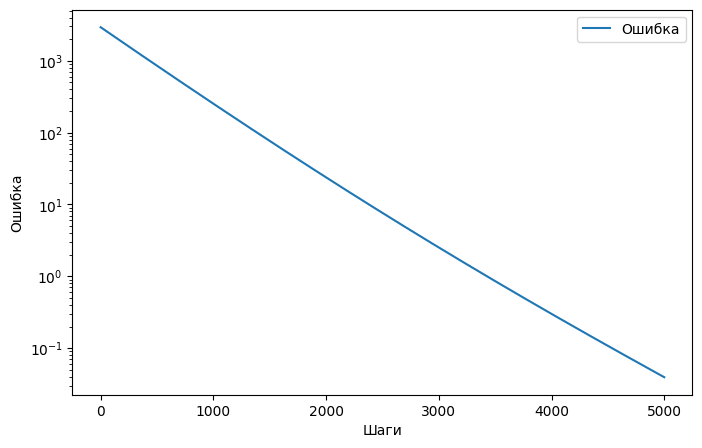

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Функция для обработки входных данных
def preprocess_data(data):
    if isinstance(data, pd.DataFrame):
        if data.shape[1] > 1:
            raise ValueError(f"DataFrame содержит {data.shape[1]} столбцов, нужен только один.")
        return data.iloc[:, 0]  # Преобразуем в Series
    elif isinstance(data, pd.Series):
        return data
    else:
        raise TypeError("Данные должны быть либо Series, либо DataFrame")

class Model:
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        X = preprocess_data(X)  # Приводим X к Series
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        X, Y = preprocess_data(X), preprocess_data(Y)
        return np.sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    def fit(self, X, Y, alpha=0.001, max_steps=5000):
        X, Y = preprocess_data(X), preprocess_data(Y)  # Приводим данные к Series
        steps, errors = [], []

        for step in range(max_steps):
            dJ0 = np.sum(self.predict(X) - Y) / len(X)
            dJ1 = np.sum((self.predict(X) - Y) * X) / len(X)

            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_err = self.error(X, Y)

            # Проверка на расходимость
            if np.isnan(new_err) or new_err > 1e6:
                print(f"При alpha={alpha} градиентный спуск разошелся!")
                return steps, errors

            steps.append(step)
            errors.append(new_err)

            # Если ошибка стабилизировалась, прерываем обучение
            if step > 1 and abs(errors[-1] - errors[-2]) < 1e-6:
                break

        print(f"Градиентный спуск завершен за {len(steps)} шагов, финальная ошибка: {errors[-1]:.6f}")
        return steps, errors

# Загружаем данные и сразу превращаем их в Series
x = pd.read_csv('x.csv', index_col=0)
y = pd.read_csv('y.csv', index_col=0)

x = preprocess_data(x)
y = preprocess_data(y)

# Проверяем работу
print("Проверка работы с DataFrame и Series")
model = Model()
steps, errors = model.fit(x, y)

# График ошибки
plt.figure(figsize=(8, 5))
plt.plot(steps, errors, label="Ошибка")
plt.xlabel("Шаги")
plt.ylabel("Ошибка")
plt.yscale("log")
plt.legend()
plt.show()


**Задание 4**. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.